<div style="text-align: center; color: #345; padding-top: 10px;">
<h1 style="background-color: skyblue; font-family: newtimeroman; font-size: 220%; text-align: center;"><span style="color: #000000;">Deep Learning - Predicting loan defaults </span><span style="color: #000000;"><br></br>
    <img src="https://mma.prnewswire.com/media/76307/lending_club_logo.jpg?w=200"/><span style="color: #0000ff;"></h1>
</div>

## Data
Data contains 2 sets for data for rejected and accepted loans, from the Lending club, between 2007 to 2018 Quarter 4. \
We will look at the accepted loans and only a subset of the columns (see list below)


## Business summary
Can we predict if a given borrower will default on their loan payments using the historical data provided. i.e. will the loan be ***Charged-off*** or set to ***Default*** status

## Goal
To develop a classification model that predicts the **"loan status"** of a loan 

Description of the columns used in prediction: \
**Note** with over 150 columns in this dataset, only the below will be used

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>16</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>18</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>20</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>23</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>24</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>25</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

# Libraries

In [1]:
import numpy as np 
import pandas as pd 

#EDA 
import seaborn as sns 
import matplotlib.pyplot as plt

#Imputation 
from sklearn.impute import SimpleImputer

#split

from sklearn.model_selection import train_test_split

# Deep Learning 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

2021-11-11 14:19:12.664341: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-11 14:19:12.664456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Define theme for matplotlib and seaborn to ensure consistency
sns.set_theme()

# Read Data and review

In [3]:
df = pd.read_csv('../input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


In [5]:
df.shape

(2260701, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  addr_state            object 
 16  dti                   float64
 17  earliest_cr_line      object 
 18  open_acc              float64
 19  pub_rec               float64
 20  revol_bal             float64
 21  revol_util            float64
 22  total_acc             float64
 23  initial

In [7]:
#target analysis
df["loan_status"].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

note the null values in target 

# Target Preprocessing
Looking at the target there are multiple categories. \
For our analysis we want to define a Binary classification of ***Default vs Paid***

In [8]:
replace_status = {"Fully Paid":"Paid",
             "Current": "Paid",
             "Charged Off": "Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Fully Paid":"Paid",
              "Late (31-120 days)":"Late",
              "Late (16-30 days)":"Late",
              "In Grace Period":"Late",
              "Default":"Default"
             }

In [9]:
df["loan_status"] = df["loan_status"].replace(replace_status)

We will drop everything NOT ***Default or Paid*** i.e. null and Late \
In another notebook we can investigate how ***Late*** payments affect ***Default*** and look at imputing the null values

In [10]:
# Keep Default or Paid loans only
df = df[ (df["loan_status"]== "Paid") | (df["loan_status"]== "Default")]

In [11]:
df["loan_status"].value_counts(dropna= False)

Paid       1957056
Default     269360
Name: loan_status, dtype: int64

# Exploratory Data Analysis
1. individual column and data type investigation 
1. correlation analysis

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2226416.0,15014.086889,9177.770847,500.00,8000.00,12800.00,20000.00,4.000000e+04
int_rate,2226416.0,13.054793,4.814616,5.31,9.49,12.62,15.88,3.099000e+01
installment,2226416.0,444.870133,266.732332,4.93,251.36,377.37,591.02,1.719830e+03
annual_inc,2226412.0,77986.903246,113094.663725,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2224743.0,18.803585,14.128467,-1.00,11.89,17.82,24.47,9.990000e+02
open_acc,2226387.0,11.611802,5.636687,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2226387.0,0.197034,0.568649,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2226416.0,16676.424943,22979.604990,0.00,5958.00,11333.00,20265.00,2.904836e+06
revol_util,2224652.0,50.334659,24.708385,0.00,31.50,50.30,69.40,8.923000e+02
total_acc,2226387.0,24.177867,11.983757,1.00,15.00,22.00,31.00,1.760000e+02


In [13]:
df.shape

(2226416, 27)

<AxesSubplot:>

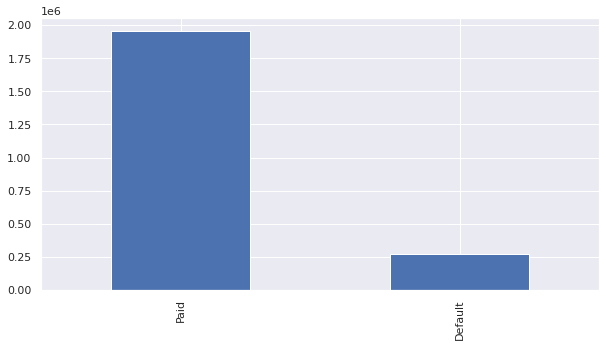

In [14]:
#Target analysis
df["loan_status"].value_counts(dropna = False).plot(kind = "bar",figsize = (10,5))

***Note*** Very imbalanced data set \
***NB*** for determining the type of metric used in prediction i.e. accuracy will not work 

### Non-numeric analysis

In [15]:
# all object type features
df.describe( include= ["object"]).transpose()

,count,unique,top,freq
term,2226416,2,36 months,1589901
grade,2226416,7,B,656005
sub_grade,2226416,35,C1,143681
emp_title,2062642,507786,Teacher,38293
emp_length,2082396,11,10+ years,737403
home_ownership,2226416,6,MORTGAGE,1096160
verification_status,2226416,3,Source Verified,871779
issue_d,2226416,139,Mar-2016,61109
loan_status,2226416,2,Paid,1957056
purpose,2226416,14,debt_consolidation,1257882


In [16]:
def create_countplot(axes, x_val,order_val, title, rotation="n"):
    sns.countplot(ax= axes, data=df, x=x_val, order = order_val.value_counts(dropna= False).index,hue = "loan_status")
    axes.set_title(title)
    if rotation =="y":
        axes.set_xticklabels(list(order_val.unique()), rotation=90)

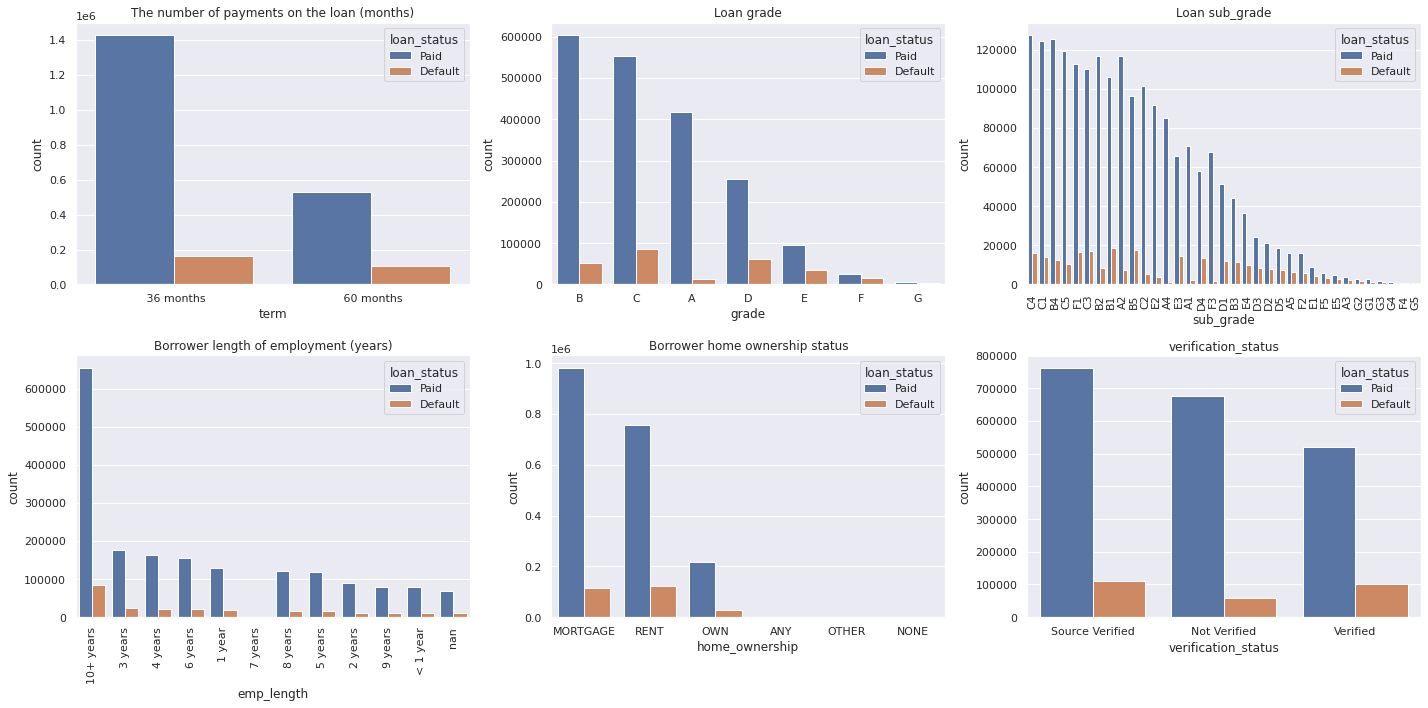

In [17]:
fig, ax = plt.subplots(2,3, figsize= (20,10))

create_countplot(ax[0,0],'term', df["term"],"The number of payments on the loan (months)" )

create_countplot(ax[0,1],'grade', df["grade"],"Loan grade")

create_countplot(ax[0,2],'sub_grade', df["sub_grade"],"Loan sub_grade","y")

create_countplot(ax[1,0],'emp_length', df["emp_length"],"Borrower length of employment (years)", "y" )

create_countplot(ax[1,1],'home_ownership', df["home_ownership"],"Borrower home ownership status" )

create_countplot(ax[1,2],'verification_status', df["verification_status"],"verification_status" )


plt.tight_layout()
plt.show()

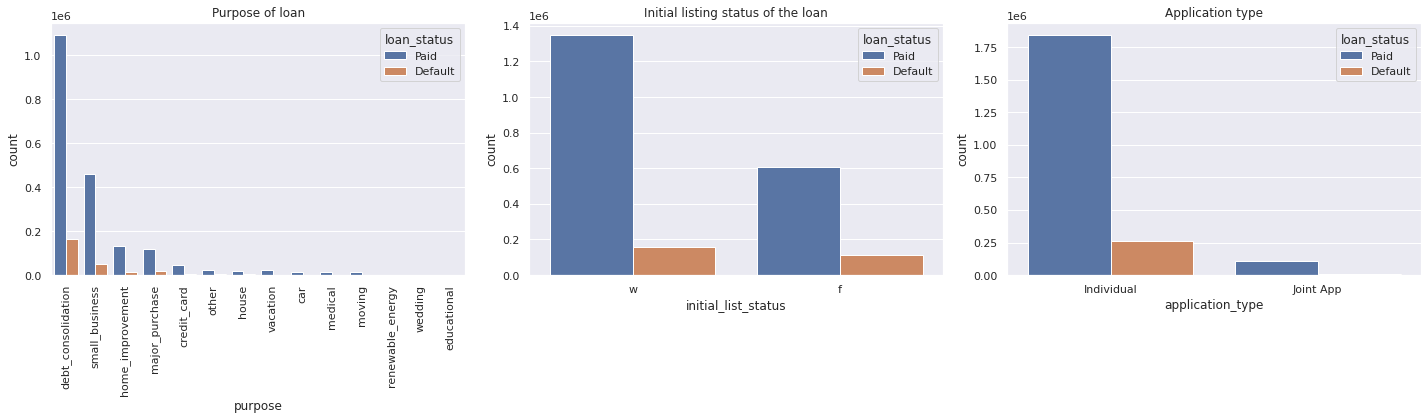

In [18]:
fig, ax = plt.subplots(1,3, figsize= (20,6))

create_countplot(ax[0],'purpose', df["purpose"],"Purpose of loan" ,"y")
create_countplot(ax[1],'initial_list_status', df["initial_list_status"],"Initial listing status of the loan" )
create_countplot(ax[2],'application_type', df["application_type"],"Application type" )



plt.tight_layout()
plt.show()

In [19]:
## too many unique titles to plot 
df["emp_title"].value_counts(dropna= False)

NaN                                     163774
Teacher                                  38293
Manager                                  33693
Owner                                    21394
Registered Nurse                         15622
                                         ...  
Medication Aid - Memory Support Unit         1
Driver salemen                               1
Account Specialist III                       1
Customer Care Lead                           1
Current Operations Officer                   1
Name: emp_title, Length: 507787, dtype: int64

In [20]:
df[["title","purpose"]]

,title,purpose
0,Debt consolidation,debt_consolidation
1,Business,small_business
2,NaN,home_improvement
3,Debt consolidation,debt_consolidation
4,Major purchase,major_purchase
...,...,...
2260694,Home improvement,home_improvement
2260695,Debt consolidation,debt_consolidation
2260696,NaN,debt_consolidation
2260697,Debt consolidation,debt_consolidation


Puropose and Title are essentially duplicates with Purpose being more descriptive \
As such we can drop Title 

### Date Analysis

In [21]:
#convert to date 
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])

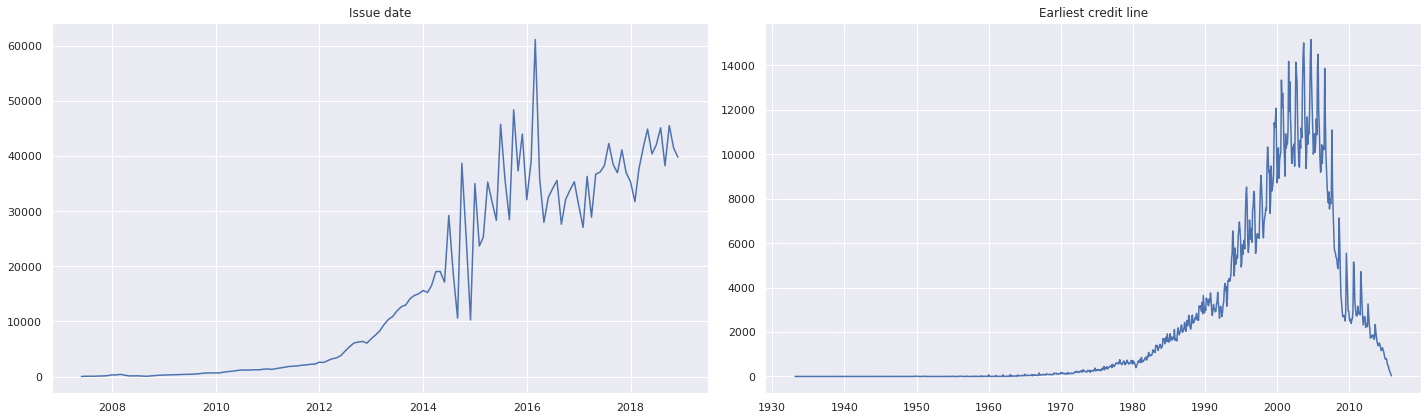

In [22]:
fig, ax = plt.subplots(1,2, figsize= (20,6))

ax[0].plot(df['issue_d'].value_counts().sort_index())
ax[1].plot(df['earliest_cr_line'].value_counts().sort_index())
ax[0].set_title("Issue date")
ax[1].set_title("Earliest credit line")

plt.tight_layout()
plt.show()

##### Feature Engineering notes
From the above the categorical values need to be processed

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

### 2. Correlation Analysis

<AxesSubplot:>

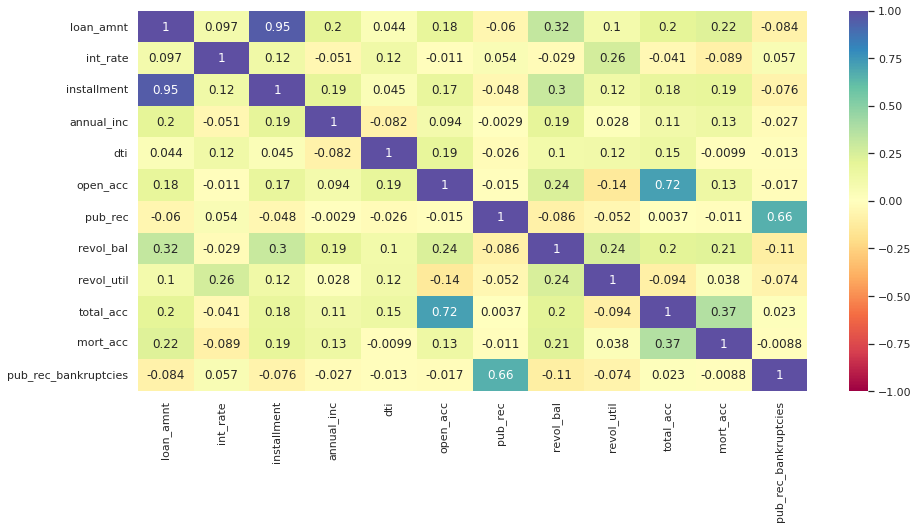

In [23]:
plt.figure(figsize= (15,7))
sns.heatmap(df.corr(), vmin=1, vmax=-1, annot=True, cmap="Spectral")

# Null Analysis & Processing
This step can be very time intensive depending on the approach 

Options are:
1. Use regression / classification techniques to find the missing values - ***very time intensive***
1. Imputation of null values with mean, median or mode
    * Use other features to group, then use impute mean,median, mode by grouping   - ***somewhat time intensive***
    
            i.e. to impute "revol_util", find the mean of "revol_util" groupby "purpose", then impute values based on grouping
            df.groupby("purpose")["revol_util"].mean()             

    * apply mean, median, mode across the whole column for imputation - ***least time intensive***
    

#### To save time we will go with the easiest method, but first lets some quick analysis

In [24]:
df.isnull().sum()[df.isnull().sum()>0]

emp_title               163774
emp_length              144020
annual_inc                   4
title                    22872
dti                       1673
earliest_cr_line            29
open_acc                    29
pub_rec                     29
revol_util                1764
total_acc                   29
mort_acc                 50030
pub_rec_bankruptcies      1365
dtype: int64

Text(0.5, 1.0, 'Heatmap of blank values')

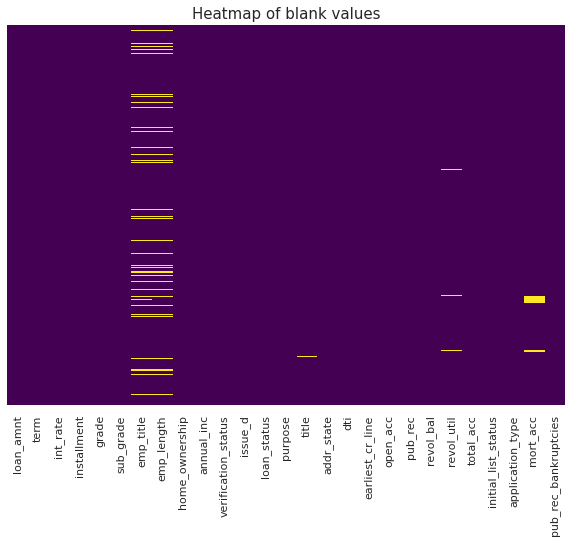

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(df.isnull(), cmap = "viridis",  cbar=False, yticklabels=False)
plt.title("Heatmap of blank values",fontsize =15)

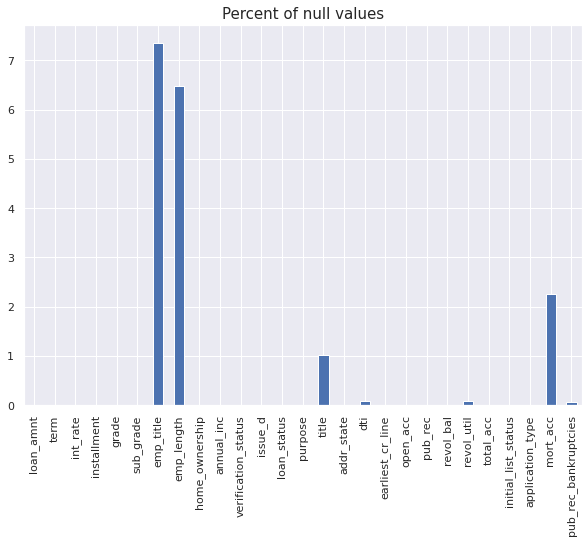

In [26]:
((df.isnull().sum()/len(df))*100).plot(kind = "bar", figsize = (10,7))
plt.title("Percent of null values",fontsize= 15)
plt.show()

# Imputation
#### Notes: 

* Numerical vals  impute with mean 
* categorical vals imputewith model 

*** We can ignore title & emp_length as we will drop these features ***

In [27]:
imputer_mean = SimpleImputer() #mean imputation
imputer_mode = SimpleImputer(strategy="most_frequent")

## mean 
* annual_inc
* dti
* open_acc
* pub_rec
* revol_util
* total_acc
* mort_acc
* pub_rec_bankruptcies
## mode
* emp_title
* "earliest_cr_line"    ---Date

In [28]:
## Reset index for concat 
df = df.reset_index(drop = True)

In [29]:
mode_impute = ["emp_title","earliest_cr_line"]
mean_impute = ["annual_inc","dti","open_acc","pub_rec","revol_util","total_acc","mort_acc","pub_rec_bankruptcies"]

In [30]:
mean_df = pd.DataFrame(data = imputer_mean.fit_transform(df[mean_impute]), columns = mean_impute)

In [31]:
df.drop(mean_impute,axis = 1,inplace =True)

In [32]:
df = pd.concat([df,mean_df],axis =1)

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,...,initial_list_status,application_type,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,Not Verified,...,w,Individual,55000.0,5.91,7.0,0.0,29.7,13.0,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,...,w,Individual,65000.0,16.06,22.0,0.0,19.2,38.0,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,...,w,Joint App,63000.0,10.78,6.0,0.0,56.2,18.0,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,...,w,Individual,110000.0,17.06,13.0,0.0,11.6,17.0,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,...,w,Individual,104433.0,25.37,12.0,0.0,64.5,35.0,6.0,0.0


In [34]:
df["emp_length"].fillna(df["emp_length"].mode()[0], inplace = True)
df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0],inplace = True)

In [35]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               163774
emp_length                   0
home_ownership               0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    22872
addr_state                   0
earliest_cr_line             0
revol_bal                    0
initial_list_status          0
application_type             0
annual_inc                   0
dti                          0
open_acc                     0
pub_rec                      0
revol_util                   0
total_acc                    0
mort_acc                     0
pub_rec_bankruptcies         0
dtype: int64

## Drop 
* emp_title
* title
* grade

In [36]:
# too many unique values 
df.drop("emp_title",axis =1, inplace = True)

# title is the same as "purpose" we can therefore drop this column
df.drop("title",axis =1, inplace = True)

## grade holds the same information as subgrade
df.drop("grade",axis =1, inplace = True)

# Feature Engineering 
as per above 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

## Convert to numerical


In [37]:
df["term"] = df["term"].apply(lambda x : x[:3]).astype(int)
print(df["term"].value_counts())

36    1589901
60     636515
Name: term, dtype: int64


In [38]:
df["emp_length"].value_counts()

10+ years    881423
2 years      200531
< 1 year     186757
3 years      177937
1 year       146116
5 years      137572
4 years      134393
6 years      101130
7 years       91492
8 years       90682
9 years       78383
Name: emp_length, dtype: int64

In [39]:
replace_dictionary = {"< 1 year":"1 years" }
df["emp_length"].replace(replace_dictionary,inplace=True)

In [40]:
df["emp_length"] =df["emp_length"].apply(lambda x: x[:2]).astype(int)

## Dummies
Convert all categorical (non-ordinal) features into dummy columns including the target column 

In [41]:
## Target to dummies 
df["loan_status"] = df["loan_status"].map({"Paid":0,"Default":1})

In [42]:
df["home_ownership"].value_counts()

MORTGAGE    1096160
RENT         880180
OWN          248869
ANY             971
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [43]:
# lets group None and Any --> Other
df["home_ownership"]= df["home_ownership"].replace(["ANY","NONE"], "OTHER")

In [44]:
dummy_cols = [ "home_ownership", "verification_status", "purpose","initial_list_status", "application_type","sub_grade", "addr_state"]


In [45]:
#get dummy columns
df_dummies = pd.get_dummies(df[dummy_cols], drop_first=True)

#drop from original dataframe
df.drop(dummy_cols,axis =1, inplace=True)

In [46]:
df= pd.concat([df,df_dummies],axis =1)

## Date Processing 
We can extract the year, month and day values from the two columns 
* issue_d  ---- date loan was issued 
* earliest_cr_line --- earliest credit line month

### Note:
**issue_d** should be dropped as this tells us that the loan was already issued, we want to understand if a loan has defaulted **before** a loan is issued
This is therefore data leakage and issue_d should be dropped 

In [47]:
df.drop("issue_d",axis =1, inplace=True)

In [48]:
print(df["earliest_cr_line"].value_counts())

2004-09-01    15184
2003-09-01    15004
2005-09-01    14494
2003-08-01    14432
2001-08-01    14175
              ...  
1952-07-01        1
1933-03-01        1
1951-08-01        1
1957-09-01        1
1946-12-01        1
Name: earliest_cr_line, Length: 754, dtype: int64


We can ignore the day value as this is only the first

In [49]:
# extract year column 
df["year_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.year

#extract month column 
df["month_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.month

#drop old column as we dont it now
df.drop(["earliest_cr_line"],axis=1, inplace=True)

In [50]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226416 entries, 0 to 2226415
Data columns (total 20 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 int64  
 2   int_rate                             float64
 3   installment                          float64
 4   emp_length                           int64  
 5   loan_status                          int64  
 6   revol_bal                            float64
 7   annual_inc                           float64
 8   dti                                  float64
 9   open_acc                             float64
 10  pub_rec                              float64
 11  revol_util                           float64
 12  total_acc                            float64
 13  mort_acc                             float64
 14  pub_rec_bankruptcies                 float64
 15  home_ownership_OTHER            

# Split 

In [51]:
####################### ------- DELETE ------FOR Testing only ##########3
#df = df.sample(n= 100000, random_state = 42)


##################################### DELETE #################3

df["loan_status"].value_counts()

0    1957056
1     269360
Name: loan_status, dtype: int64

In [52]:
X = df.drop("loan_status",axis =1 )
y= df["loan_status"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling 

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
# we only transform X_test to stop any leakage 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train

array([[0.35189873, 1.        , 0.47702492, ..., 0.        , 0.75609756,
        0.72727273],
       [0.24050633, 0.        , 0.10358255, ..., 0.        , 0.86585366,
        0.18181818],
       [0.24050633, 0.        , 0.51168224, ..., 0.        , 0.86585366,
        0.09090909],
       ...,
       [0.59493671, 1.        , 0.28738318, ..., 0.        , 0.82926829,
        0.45454545],
       [0.18987342, 0.        , 0.2017134 , ..., 0.        , 0.85365854,
        0.        ],
       [0.18987342, 0.        , 0.2017134 , ..., 0.        , 0.87804878,
        0.27272727]])

# TPU Setup 
https://www.kaggle.com/docs/tpu

In [58]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.0.0.2:8470']


2021-11-11 14:23:00.831027: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-11 14:23:00.834376: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-11 14:23:00.834421: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 14:23:00.834461: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4f3c81b0b2e8): /proc/driver/nvidia/version does not exist
2021-11-11 14:23:00.838459: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

# Deep learning  - Multilayer Perceptons

## Base model
We will use a basic model with dropout layers (to reduce overfitting). We can then look changing the bias/ threshold due to the imbalanced dataset

In [59]:
EPOCHS = 100
BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min')

step_epoch = len(df)/BATCH_SIZE

In [60]:
METRICS = [
     # tf.keras.metrics.TruePositives(name='tp'),
      #tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

### Number of Layers and neurons 
As a general rule of thumb
* The number of inital neurons in the ***first layer***= total number of features or less 
* The number of inital neurons in the ***second layer***= approx. half of the number of features
* The number of hiden layers is 2 
This is what we will start with but can be changed in future runs 

In [61]:
df.shape

(2226416, 121)

In [62]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [63]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = make_model()

# train model normally
model.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

2021-11-11 14:23:09.129564: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 716015040 exceeds 10% of free system memory.


Epoch 1/100
11654/11654 [==============================] - ETA: 0s - loss: 0.3660

2021-11-11 14:25:00.724320: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 352664640 exceeds 10% of free system memory.


11654/11654 [==============================] - 149s 13ms/step - loss: 0.3659 - val_loss: 0.3375
Epoch 2/100
11654/11654 [==============================] - 149s 13ms/step - loss: 0.3416 - val_loss: 0.3367
Epoch 3/100
11654/11654 [==============================] - 145s 12ms/step - loss: 0.3397 - val_loss: 0.3369
Epoch 4/100
11654/11654 [==============================] - 150s 13ms/step - loss: 0.3389 - val_loss: 0.3350
Epoch 5/100
11654/11654 [==============================] - 144s 12ms/step - loss: 0.3377 - val_loss: 0.3346
Epoch 6/100
11654/11654 [==============================] - 144s 12ms/step - loss: 0.3372 - val_loss: 0.3333
Epoch 7/100
11654/11654 [==============================] - 145s 12ms/step - loss: 0.3372 - val_loss: 0.3328
Epoch 8/100
11654/11654 [==============================] - 140s 12ms/step - loss: 0.3366 - val_loss: 0.3323
Epoch 9/100
11654/11654 [==============================] - 136s 12ms/step - loss: 0.3364 - val_loss: 0.3328
Epoch 10/100
11654/11654 [==============

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               14520     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 21,841
Trainable params: 21,841
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation 

We note that the classes are imbalanced, there are very few Default loans. 

In [65]:
neg  = df["loan_status"].value_counts()[0]
pos = df["loan_status"].value_counts()[1]

print("% of False:",neg/ len(df))
print("% of True:",pos / len(df))

% of False: 0.8790163204001409
% of True: 0.12098367959985915


We need to beat an accuracy of 87% \
i.e. a model that only notes False (not Paid) 

<AxesSubplot:>

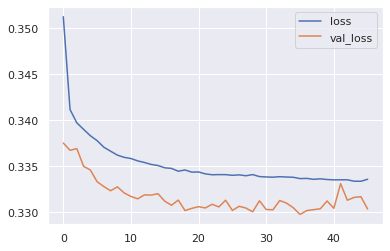

In [66]:
history = pd.DataFrame(data = model.history.history)

## Plot the loss of the traing and test set 
history.plot()

In [67]:
print( "best epoch: ", history["val_loss"].argmin() )

best epoch:  35


In [68]:
model.evaluate(X_test,y_test)

2021-11-11 16:18:17.349499: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 352664640 exceeds 10% of free system memory.


22960/22960 [==============================] - 207s 9ms/step - loss: 0.3304


0.33035585284233093

In [69]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

2021-11-11 16:22:43.412880: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 352664640 exceeds 10% of free system memory.


In [70]:
print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

0.8791332184593272
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    645909
           1       0.64      0.00      0.00     88809

    accuracy                           0.88    734718
   macro avg       0.76      0.50      0.47    734718
weighted avg       0.85      0.88      0.82    734718



### Poor performance 
87% accuracy as seen above is not ideal, as this is showing that the model may only be labelling most things FALSE
We can also see this via the F1 score for 1 (positive) of 0.0, which is very poor 

# New bias model 

In [71]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.98314781])

In [72]:
with tpu_strategy.scope(): 
  model_bias = make_model(output_bias=initial_bias)

# train model normally
model_bias.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

2021-11-11 16:28:55.686540: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 716015040 exceeds 10% of free system memory.


Epoch 1/100
11654/11654 [==============================] - 148s 12ms/step - loss: 0.3466 - val_loss: 0.3377
Epoch 2/100
11654/11654 [==============================] - 147s 13ms/step - loss: 0.3399 - val_loss: 0.3365
Epoch 3/100
11654/11654 [==============================] - 145s 12ms/step - loss: 0.3380 - val_loss: 0.3364
Epoch 4/100
11654/11654 [==============================] - 144s 12ms/step - loss: 0.3391 - val_loss: 0.3347
Epoch 5/100
11654/11654 [==============================] - 144s 12ms/step - loss: 0.3384 - val_loss: 0.3346
Epoch 6/100
11654/11654 [==============================] - 141s 12ms/step - loss: 0.3376 - val_loss: 0.3349
Epoch 7/100
11654/11654 [==============================] - 141s 12ms/step - loss: 0.3364 - val_loss: 0.3346
Epoch 8/100
11654/11654 [==============================] - 138s 12ms/step - loss: 0.3367 - val_loss: 0.3327
Epoch 9/100
11654/11654 [==============================] - 143s 12ms/step - loss: 0.3360 - val_loss: 0.3328
Epoch 10/100
11654/11654 [==

<AxesSubplot:>

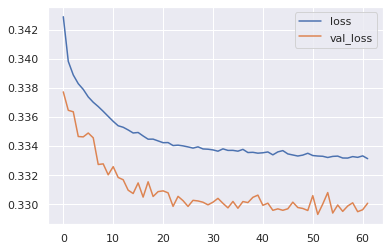

In [73]:
history_bias = pd.DataFrame(data = model_bias.history.history)

history_bias[["loss","val_loss"]].plot()

In [74]:
model_bias.evaluate(X_test,y_test)

22960/22960 [==============================] - 221s 10ms/step - loss: 0.3301


0.3300783336162567

In [75]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

In [76]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

0.8791318573929044
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    645909
           1       0.52      0.00      0.00     88809

    accuracy                           0.88    734718
   macro avg       0.70      0.50      0.47    734718
weighted avg       0.84      0.88      0.82    734718



# New Weighted model 
*The goal is to identify fraudulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.*


***Note***: Scaling by len(df)/2 helps keep the loss to a similar magnitude.\
***Note***: The sum of the weights of all examples stays the same.

In [77]:
weight_for_0 = (1 / neg) * (len(df) / 2.0)
weight_for_1 = (1 / pos) * (len(df) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.13


In [78]:
with tpu_strategy.scope(): 
  model_weighted = make_model(output_bias=initial_bias)

## note the class weight 
model_weighted.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping
                  ,class_weight=class_weight)

Epoch 1/100
11654/11654 [==============================] - 152s 13ms/step - loss: 0.6552 - val_loss: 0.5946
Epoch 2/100
11654/11654 [==============================] - 154s 13ms/step - loss: 0.6266 - val_loss: 0.6025
Epoch 3/100
11654/11654 [==============================] - 156s 13ms/step - loss: 0.6244 - val_loss: 0.6093
Epoch 4/100
11654/11654 [==============================] - 150s 13ms/step - loss: 0.6214 - val_loss: 0.6082
Epoch 5/100
11654/11654 [==============================] - 149s 13ms/step - loss: 0.6212 - val_loss: 0.6185
Epoch 6/100
11654/11654 [==============================] - 152s 13ms/step - loss: 0.6198 - val_loss: 0.6332
Epoch 7/100
11654/11654 [==============================] - 154s 13ms/step - loss: 0.6181 - val_loss: 0.6329
Epoch 8/100
11654/11654 [==============================] - 151s 13ms/step - loss: 0.6186 - val_loss: 0.5943
Epoch 9/100
11654/11654 [==============================] - 150s 13ms/step - loss: 0.6170 - val_loss: 0.6075
Epoch 10/100
11654/11654 [==

<AxesSubplot:>

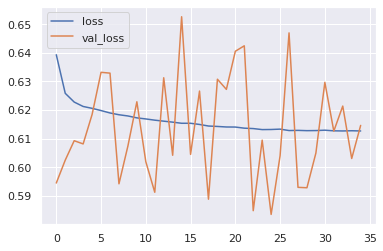

In [79]:
history_weighted = pd.DataFrame(data = model_weighted.history.history)

## Plot the loss of the traing and test set 
history_weighted.plot()

In [80]:
model_weighted.evaluate(X_test,y_test)

22960/22960 [==============================] - 199s 9ms/step - loss: 0.6147


0.6146717667579651

In [81]:
history_weighted["val_loss"].argmin()

24

In [82]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_weighted.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

0.638854635383916
              precision    recall  f1-score   support

           0       0.94      0.63      0.75    645909
           1       0.21      0.72      0.32     88809

    accuracy                           0.64    734718
   macro avg       0.58      0.67      0.54    734718
weighted avg       0.85      0.64      0.70    734718

